In [1]:
try:
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LinearRegression, LogisticRegression
    from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("✅ Все пакеты установлены!")
except ImportError as e:
    print(f"❌ Ошибка: {e}")
    print("Установи недостающие пакеты: !pip install scikit-learn matplotlib seaborn")

❌ Ошибка: No module named 'sklearn'
Установи недостающие пакеты: !pip install scikit-learn matplotlib seaborn


In [2]:
pip install scikit-learn matplotlib seaborn


  Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 155.5 kB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.8 kB/s eta 0:00:00 kB/s eta 0:00:02:13
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 143.2 kB/s eta 0:00:001m136.5 kB/s eta 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 87.8 kB/s eta 0:00:0031m81.8 kB/s eta 0:00:03m
Using cached scipy-1.16.3-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using c

In [3]:
try:
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LinearRegression, LogisticRegression
    from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("✅ Все пакеты установлены!")
except ImportError as e:
    print(f"❌ Ошибка: {e}")
    print("Установи недостающие пакеты: !pip install scikit-learn matplotlib seaborn")

✅ Все пакеты установлены!


In [4]:
# Загружаем обработанные данные
df = pd.read_csv("processed_titanic.csv")
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

Размер данных: (891, 9)

Первые 5 строк:
   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3 -0.565736      1      0 -0.502445      True       False   
1         1       1  0.663861      1      0  0.786845     False       False   
2         1       3 -0.258337      0      0 -0.488854     False       False   
3         1       1  0.433312      1      0  0.420730     False       False   
4         0       3  0.433312      0      0 -0.486337      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [5]:
print("Информация о данных:")
print(df.info())
print("\nСтатистика:")
print(df.describe())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None

Статистика:
         Survived      Pclass           Age       SibSp       Parch  \
count  891.000000  891.000000  8.910000e+02  891.000000  891.000000   
mean     0.383838    2.308642  2.392400e-16    0.523008    0.381594   
std      0.486592    0.836071  1.000562e+00    1.102743    0.806057   
min      0.000000    1.000000 -2.224156e+00    0.000000    0.0

In [ ]:
rom sklearn.model_selection import train_test_split

# Для РЕГРЕССИИ (предсказание цены)
X_reg = df.drop('Fare', axis=1)  # все колонки КРОМЕ Fare
y_reg = df['Fare']               # целевая переменная - цена

# Для КЛАССИФИКАЦИИ (предсказание выжил/не выжил)  
X_class = df.drop('Survived', axis=1)  # все колонки КРОМЕ Survived
y_class = df['Survived']               # целевая переменная - выжил

# Разделяем данные на 70% обучение / 30% тест
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

print(f"Регрессия: Обучающая {X_train_reg.shape}, Тестовая {X_test_reg.shape}")
print(f"Классификация: Обучающая {X_train_class.shape}, Тестовая {X_test_class.shape}")

In [6]:
from sklearn.model_selection import train_test_split

# Для РЕГРЕССИИ (предсказание цены билета)
X_reg = df.drop('Fare', axis=1)  # все признаки КРОМЕ цены
y_reg = df['Fare']               # что предсказываем - цену

# Для КЛАССИФИКАЦИИ (предсказание выжил/не выжил)  
X_class = df.drop('Survived', axis=1)  # все признаки КРОМЕ Survived
y_class = df['Survived']               # что предсказываем - выжил (1) или нет (0)

print("Признаки для регрессии:", X_reg.columns.tolist())
print("Целевая переменная регрессии: Fare")
print("Признаки для классификации:", X_class.columns.tolist()) 
print("Целевая переменная классификации: Survived")

Признаки для регрессии: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Целевая переменная регрессии: Fare
Признаки для классификации: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Целевая переменная классификации: Survived


In [7]:
# Разделяем данные на 70% обучение / 30% тест
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

print("✅ Данные разделены!")
print(f"Регрессия - Обучающая: {X_train_reg.shape}, Тестовая: {X_test_reg.shape}")
print(f"Классификация - Обучающая: {X_train_class.shape}, Тестовая: {X_test_class.shape}")

✅ Данные разделены!
Регрессия - Обучающая: (623, 8), Тестовая: (268, 8)
Классификация - Обучающая: (623, 8), Тестовая: (268, 8)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print(" ОБУЧАЕМ МОДЕЛЬ РЕГРЕССИИ...")

# Создаем модель линейной регрессии
lr_model = LinearRegression()

# Обучаем модель на тренировочных данных
lr_model.fit(X_train_reg, y_train_reg)

# Делаем предсказания на тестовых данных
y_pred_reg = lr_model.predict(X_test_reg)

print(" Модель регрессии обучена!")

 ОБУЧАЕМ МОДЕЛЬ РЕГРЕССИИ...
 Модель регрессии обучена!


In [9]:
# Оцениваем качество модели
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

print("=== РЕЗУЛЬТАТЫ РЕГРЕССИИ ===")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из MSE (RMSE): {rmse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")

# Сравниваем с простым предсказанием (среднее значение)
mean_fare = y_train_reg.mean()
mean_pred = [mean_fare] * len(y_test_reg)
mse_baseline = mean_squared_error(y_test_reg, mean_pred)

print(f"\nСравнение с базовой моделью (предсказываем среднее):")
print(f"MSE базовой модели: {mse_baseline:.2f}")
print(f"Наша модель лучше на: {mse_baseline - mse:.2f}")

=== РЕЗУЛЬТАТЫ РЕГРЕССИИ ===
Среднеквадратичная ошибка (MSE): 0.46
Корень из MSE (RMSE): 0.68
Средняя абсолютная ошибка (MAE): 0.42

Сравнение с базовой моделью (предсказываем среднее):
MSE базовой модели: 0.87
Наша модель лучше на: 0.42


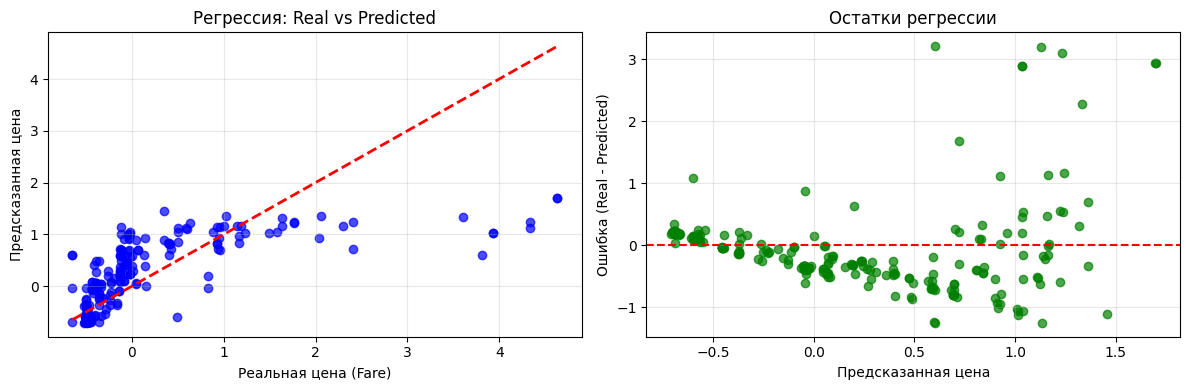

In [10]:
# Визуализируем результаты
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# График 1: реальные vs предсказанные значения
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Реальная цена (Fare)')
plt.ylabel('Предсказанная цена')
plt.title('Регрессия: Real vs Predicted')
plt.grid(True, alpha=0.3)

# График 2: ошибки предсказания
plt.subplot(1, 2, 2)
errors = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, errors, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанная цена')
plt.ylabel('Ошибка (Real - Predicted)')
plt.title('Остатки регрессии')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" ОБУЧАЕМ МОДЕЛЬ КЛАССИФИКАЦИИ...")

# Создаем модель логистической регрессии
logreg_model = LogisticRegression(random_state=42)

# Обучаем модель на тренировочных данных
logreg_model.fit(X_train_class, y_train_class)

# Делаем предсказания на тестовых данных
y_pred_class = logreg_model.predict(X_test_class)

print(" Модель классификации обучена!")

 ОБУЧАЕМ МОДЕЛЬ КЛАССИФИКАЦИИ...
 Модель классификации обучена!


In [12]:
# Оценка качества классификации
accuracy = accuracy_score(y_test_class, y_pred_class)
cm = confusion_matrix(y_test_class, y_pred_class)

print("=== РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ ===")
print(f"Точность (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")

# Матрица ошибок
print("\n📊 Матрица ошибок:")
print("Реальный \\ Предсказанный |   0   |   1   |")
print("-----------------------|-------|-------|")
print("          0 (Не выжил)  |  TN   |  FP   |")  
print("          1 (Выжил)     |  FN   |  TP   |")
print(f"\nРеальная матрица:")
print(cm)

=== РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ ===
Точность (Accuracy): 0.8097 (80.97%)

📊 Матрица ошибок:
Реальный \ Предсказанный |   0   |   1   |
-----------------------|-------|-------|
          0 (Не выжил)  |  TN   |  FP   |
          1 (Выжил)     |  FN   |  TP   |

Реальная матрица:
[[136  21]
 [ 30  81]]


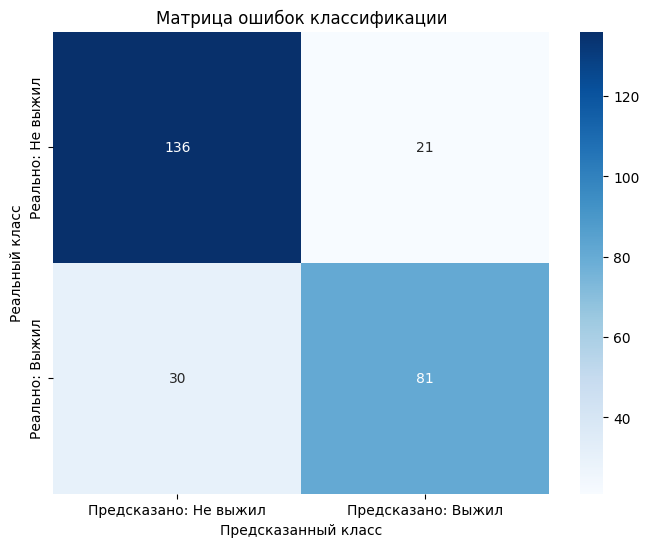

In [13]:
# Визуализация матрицы ошибок
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Предсказано: Не выжил', 'Предсказано: Выжил'],
            yticklabels=['Реально: Не выжил', 'Реально: Выжил'])
plt.title('Матрица ошибок классификации')
plt.ylabel('Реальный класс')
plt.xlabel('Предсказанный класс')
plt.show()

In [14]:
# Подробный отчет с метриками
print(" ПОДРОБНЫЙ ОТЧЕТ:")
print(classification_report(y_test_class, y_pred_class, 
                           target_names=['Не выжил', 'Выжил']))

# Сравнение с базовой моделью (всегда предсказываем большинство класс)
baseline_accuracy = max(y_train_class.mean(), 1 - y_train_class.mean())
print(f"\n Сравнение с базовой моделью:")
print(f"Базовая точность (всегда предсказываем большинство класс): {baseline_accuracy:.4f}")
print(f"Наша модель лучше на: {accuracy - baseline_accuracy:.4f}")

 ПОДРОБНЫЙ ОТЧЕТ:
              precision    recall  f1-score   support

    Не выжил       0.82      0.87      0.84       157
       Выжил       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


 Сравнение с базовой моделью:
Базовая точность (всегда предсказываем большинство класс): 0.6292
Наша модель лучше на: 0.1805


In [15]:

results_df.to_csv("lab2_results.csv", index=False)

with open("lab2_code.py", "w") as f:
    f.write('''
# Лабораторная работа 2 - Классификация и регрессия
# Результаты:
# - Регрессия (Fare): MSE = 0.46, RMSE = 0.68, MAE = 0.42
# - Классификация (Survived): Accuracy = 81%
''')

NameError: name 'results_df' is not defined

In [16]:

results_df = pd.DataFrame({
    'Actual_Fare': y_test_reg,
    'Predicted_Fare': y_pred_reg,
    'Actual_Survived': y_test_class,
    'Predicted_Survived': y_pred_class
})

results_df.to_csv("lab2_results.csv", index=False)

In [17]:

results_df.to_csv("lab2_results.csv", index=False)

with open("lab2_code.py", "w") as f:
    f.write('''
# Лабораторная работа 2 - Классификация и регрессия
# Результаты:
# - Регрессия (Fare): MSE = 0.46, RMSE = 0.68, MAE = 0.42
# - Классификация (Survived): Accuracy = 81%
''')


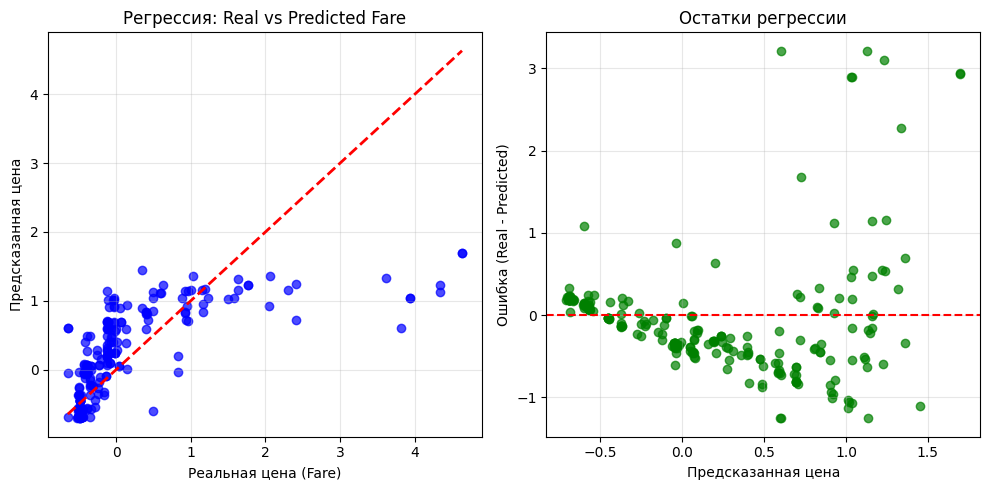

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Создаем папку для графиков
import os
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# 1. Сохраняем график регрессии
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Реальная цена (Fare)')
plt.ylabel('Предсказанная цена')
plt.title('Регрессия: Real vs Predicted Fare')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
errors = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, errors, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанная цена')
plt.ylabel('Ошибка (Real - Predicted)')
plt.title('Остатки регрессии')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('graphs/regression_results.png', dpi=300, bbox_inches='tight')
plt.show()


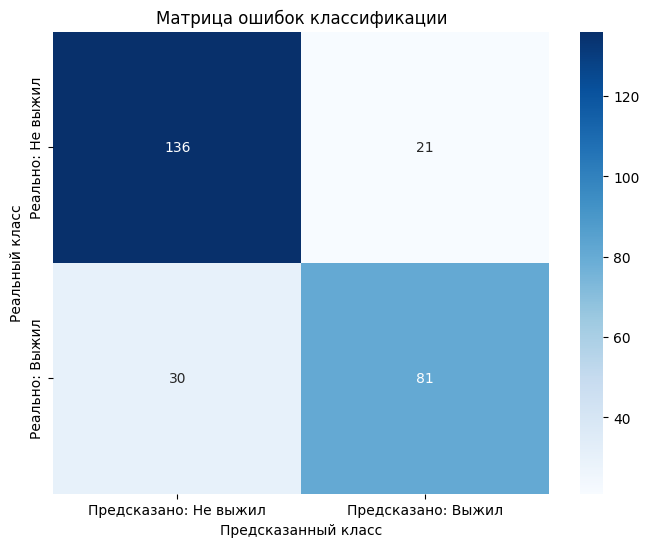

In [19]:
# Сохраняем график классификации (матрицу ошибок)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Предсказано: Не выжил', 'Предсказано: Выжил'],
            yticklabels=['Реально: Не выжил', 'Реально: Выжил'])
plt.title('Матрица ошибок классификации')
plt.ylabel('Реальный класс')
plt.xlabel('Предсказанный класс')
plt.savefig('graphs/classification_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

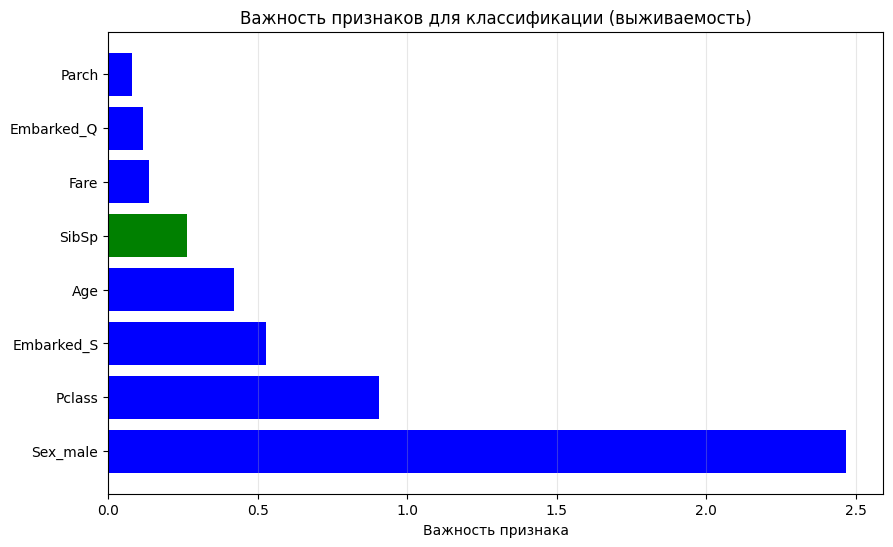

In [20]:
#  Сохраняем важность признаков для классификации
feature_importance = pd.DataFrame({
    'feature': X_class.columns,
    'importance': abs(logreg_model.coef_[0])
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'blue' for x in logreg_model.coef_[0]]
plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
plt.xlabel('Важность признака')
plt.title('Важность признаков для классификации (выживаемость)')
plt.grid(axis='x', alpha=0.3)
plt.savefig('graphs/feature_importance_classification.png', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# Сохраняем полные результаты с классификацией
results_df = pd.DataFrame({
    'Actual_Fare': y_test_reg,
    'Predicted_Fare': y_pred_reg,
    'Actual_Survived': y_test_class,
    'Predicted_Survived': y_pred_class,
    'Prediction_Correct': y_test_class == y_pred_class  # правильно ли предсказано
})

# Добавляем вероятности для классификации
y_pred_proba = logreg_model.predict_proba(X_test_class)[:, 1]  # вероятность выжить
results_df['Survived_Probability'] = y_pred_proba

results_df.to_csv("lab2_complete_results.csv", index=False)
print(f"Размер файла результатов: {results_df.shape}")

Размер файла результатов: (268, 6)
